In [1]:
import array
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [2]:
#Usage of the Array script usage.

#define the pointing direction as RA,DEC in degrees.
point_dir = [270,-30]

In [3]:
#there are several array that the user can access, lets use vla-b-configuration.
array_name = 'vla.b'

In [4]:
#using vla-b-configuration
converter = array.Array(point_dir=point_dir,array_name=array_name)

In [5]:
#get which other arrays are available
converter.predefined_antennas

{'meerkat': 'configs/meerkat.geodetic.yaml',
 'kat-7': 'configs/kat-7.geodetic.yaml',
 'vla.a': 'configs/vla.a.geodetic.yaml',
 'vla.b': 'configs/vla.b.geodetic.yaml',
 'vla.c': 'configs/vla.c.geodetic.yaml',
 'vla.d': 'configs/vla.d.geodetic.yaml',
 'vla.bna': 'configs/vla.bna.geodetic.yaml',
 'vla.cnb': 'configs/vla.cnb.geodetic.yaml',
 'vla.dnc': 'configs/vla.dnc.geodetic.yaml',
 'wsrt': 'configs/WSRT.geodetic.yaml',
 'ngvla-core-revC': 'configs/ngvla-core-revC.geodetic.yaml',
 'ngvla-core-revB': 'configs/ngvla-core-revB.geodetic.yaml',
 'ngvla-lba-revC': 'configs/ngvla-lba-revC.geodetic.yaml',
 'ngvla-mid-subarray-revC': 'configs/ngvla-mid-subarray-revC.geodetic.yaml',
 'ngvla-sba-revB': 'configs/ngvla-sba-revB.geodetic.yaml',
 'ngvla-sba-revC': 'configs/ngvla-sba-revC.geodetic.yaml',
 'ngvla-plains-revC': 'configs/ngvla-plains-revC.geodetic.yaml',
 'ngvla-plains-revB': 'configs/ngvla-plains-revB.geodetic.yaml',
 'ngvla-main-revC': 'configs/ngvla-main-revC.geodetic.yaml',
 'ngvla-g

In [6]:
#get the antenna positions and center i  lon-lat
converter.antennas, converter.array_center


(array([[-107.61965537,   34.07807177, 2115.8678291 ],
        [-107.62267975,   34.0763742 , 2116.24288328],
        [-107.62704726,   34.07392222, 2117.48330605],
        [-107.63260714,   34.07080039, 2117.11939365],
        [-107.63926632,   34.06706078, 2118.61038839],
        [-107.64695378,   34.06274354, 2123.51794452],
        [-107.65561792,   34.05787617, 2134.37740485],
        [-107.66521553,   34.05248306, 2121.24259096],
        [-107.67571244,   34.04658325, 2114.46286927],
        [-107.61688628,   34.07825208, 2115.7466519 ],
        [-107.61358239,   34.07697028, 2114.71352383],
        [-107.60881069,   34.07511742, 2114.58732328],
        [-107.60272774,   34.07275747, 2115.70756635],
        [-107.59544815,   34.06993148, 2124.97068943],
        [-107.58704326,   34.06666784, 2128.13044014],
        [-107.57757097,   34.06298873, 2134.57539501],
        [-107.56707722,   34.05891162, 2136.96000263],
        [-107.55559976,   34.05445075, 2143.2204673 ],
        [-

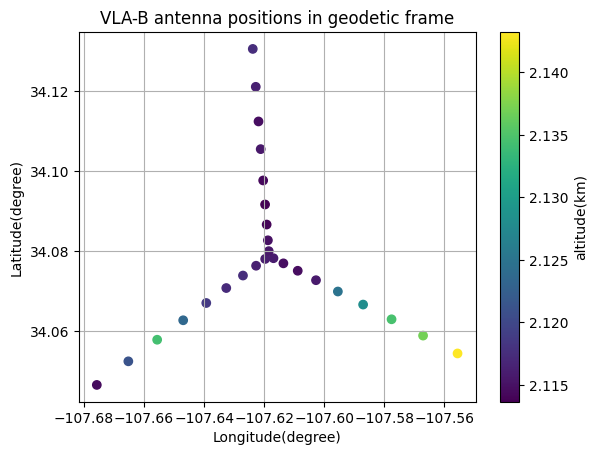

In [7]:
#plot the antenna positions in lon-lat
geodetic = converter.antennas

plt.scatter(geodetic[:,0],geodetic[:,1,],c=geodetic[:,2]/1e3,cmap='viridis')
plt.colorbar(label = 'altitude(km)')
plt.xlabel('Longitude(degree)')
plt.ylabel('Latitude(degree)')
plt.title('VLA-B antenna positions in geodetic frame')
plt.grid()

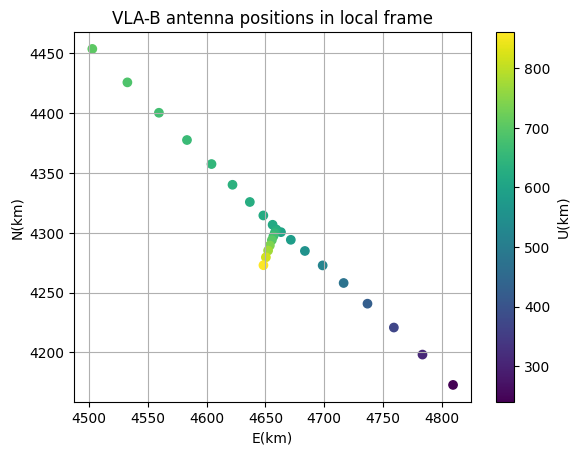

In [8]:
#convert the geodetic to local coordinates and plot
enu = converter.geodetic2local()

plt.scatter(enu[:,0]/1e3,enu[:,1]/1e3, c=enu[:,2]/1e3,cmap='viridis')
plt.colorbar(label='U(km)')
plt.xlabel('E(km)')
plt.ylabel('N(km)')
plt.title('VLA-B antenna positions in local frame')
plt.grid()
plt.show()


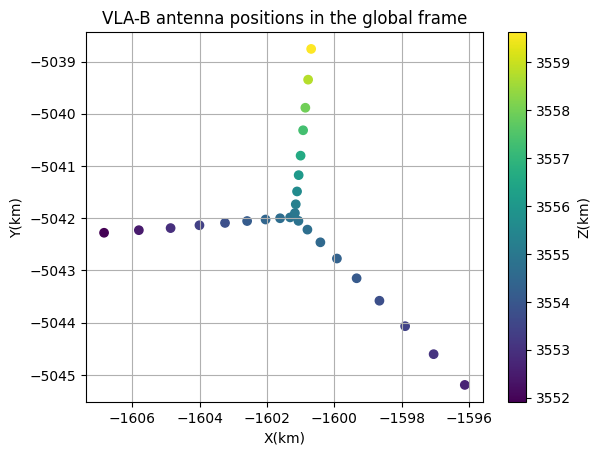

In [9]:
#get the coordinates in the global frame and plot
xyz,_ = converter.geodetic2global()

plt.scatter(xyz[:,0]/1e3,xyz[:,1]/1e3,c=xyz[:,2]/1e3,cmap='viridis')
plt.colorbar(label= 'Z(km)')
plt.xlabel('X(km)')
plt.ylabel('Y(km)')
plt.title('VLA-B antenna positions in the global frame')
plt.grid()

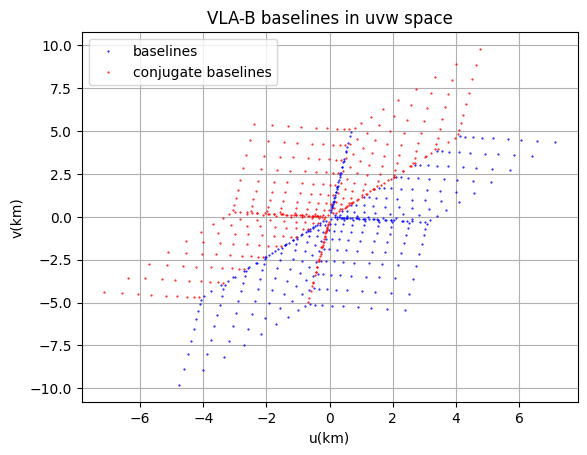

In [10]:
#ge the positions in uvw space and plot
uvw = converter.global2uvw()

pylab.plot(uvw[:,0]/1e3,uvw[:,1]/1e3,'b.',ms=1,label='baselines')
pylab.plot(-uvw[:,0]/1e3,-uvw[:,1]/1e3,'r.',ms=1,label='conjugate baselines')
pylab.xlabel('u(km)')
pylab.ylabel('v(km)')
pylab.title('VLA-B baselines in uvw space')
pylab.grid()
pylab.legend()
pylab.show()